# Top Hits Spotify - Supervised Learning
## Work Specification
The main purpose of this project was to learn how to classify exaamples in terms of the concept under analysis given a dataset, using <b>Supervised Learning</b>.
<br>
We were given a dataset regarding the top spotify hits from 2000 to 2019 and our goal was to develop a model which will take in the attributes of a certain music track and predict its popularity.

## Group 12_1B
- André Flores - up201907001
- Diogo Faria - up201907014
- Tiago Rodrigues - up201906807


## Importing the Dataset

In [1]:
import pandas as pd
#import warnings

#warnings.filterwarnings('ignore')

top_hits = pd.read_csv('..\docs\songs_normalize.csv')

### Attributes

- **artist:** Name of the Artist.
- **song:** Name of the Track.
- **duration_ms:** Duration of the track in milliseconds.
- **explicit:** The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- **year:** Release Year of the track.
- **popularity:** The higher the value the more popular the song is.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **genre:** Genre of the track.

In [23]:
top_hits.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000014    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

## Data pre-processing

### Error Data
First we checked for null values:

In [ ]:
top_hits.isnull().any().sum()

As there were no null values, we checked the data itself, and found that certain values of the column 'genre' had the value 'set()', which was an error, so those rows of data were removed:

In [2]:
top_hits = top_hits[top_hits.genre != "set()"]

In [3]:
top_hits['id'] = top_hits.index + 1

### Outliers
To check for outliers, we looked at a scatterplot matrix, though we had to temporarily remove some data since pairplot method won't be able to handle any non-numerical values.
Thus, we removed the columns that had objects or booleans:

In [4]:
import seaborn as sb
top_hits_scatter = top_hits.copy()
for col in top_hits_scatter.columns:
    if top_hits_scatter[col].dtype in ["object", "bool"]:
        top_hits_scatter = top_hits_scatter.drop(columns=[col], axis=1)

top_hits_scatter.head()

top_hits_scatter.value_counts()

duration_ms  year  popularity  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    id  
113000       2019  76          0.907         0.530   1    -6.112    1     0.1270       0.05780       0.000002          0.1010    0.507    135.998  1932    1
238746       2013  66          0.739         0.872   11   -4.059    0     0.3330       0.02170       0.000000          0.2600    0.684    95.084   1337    1
238733       2002  74          0.557         0.533   10   -6.817    0     0.0252       0.04920       0.000000          0.2050    0.233    143.994  484     1
238693       2010  69          0.392         0.839   7    -1.921    1     0.1930       0.15800       0.000000          0.3000    0.232    168.001  1158    1
238626       2008  76          0.707         0.813   11   -4.515    0     0.0571       0.08630       0.000000          0.1680    0.722    124.921  812     1
                                                               

After the data was changed, we were able to get the scatterplot matrix:

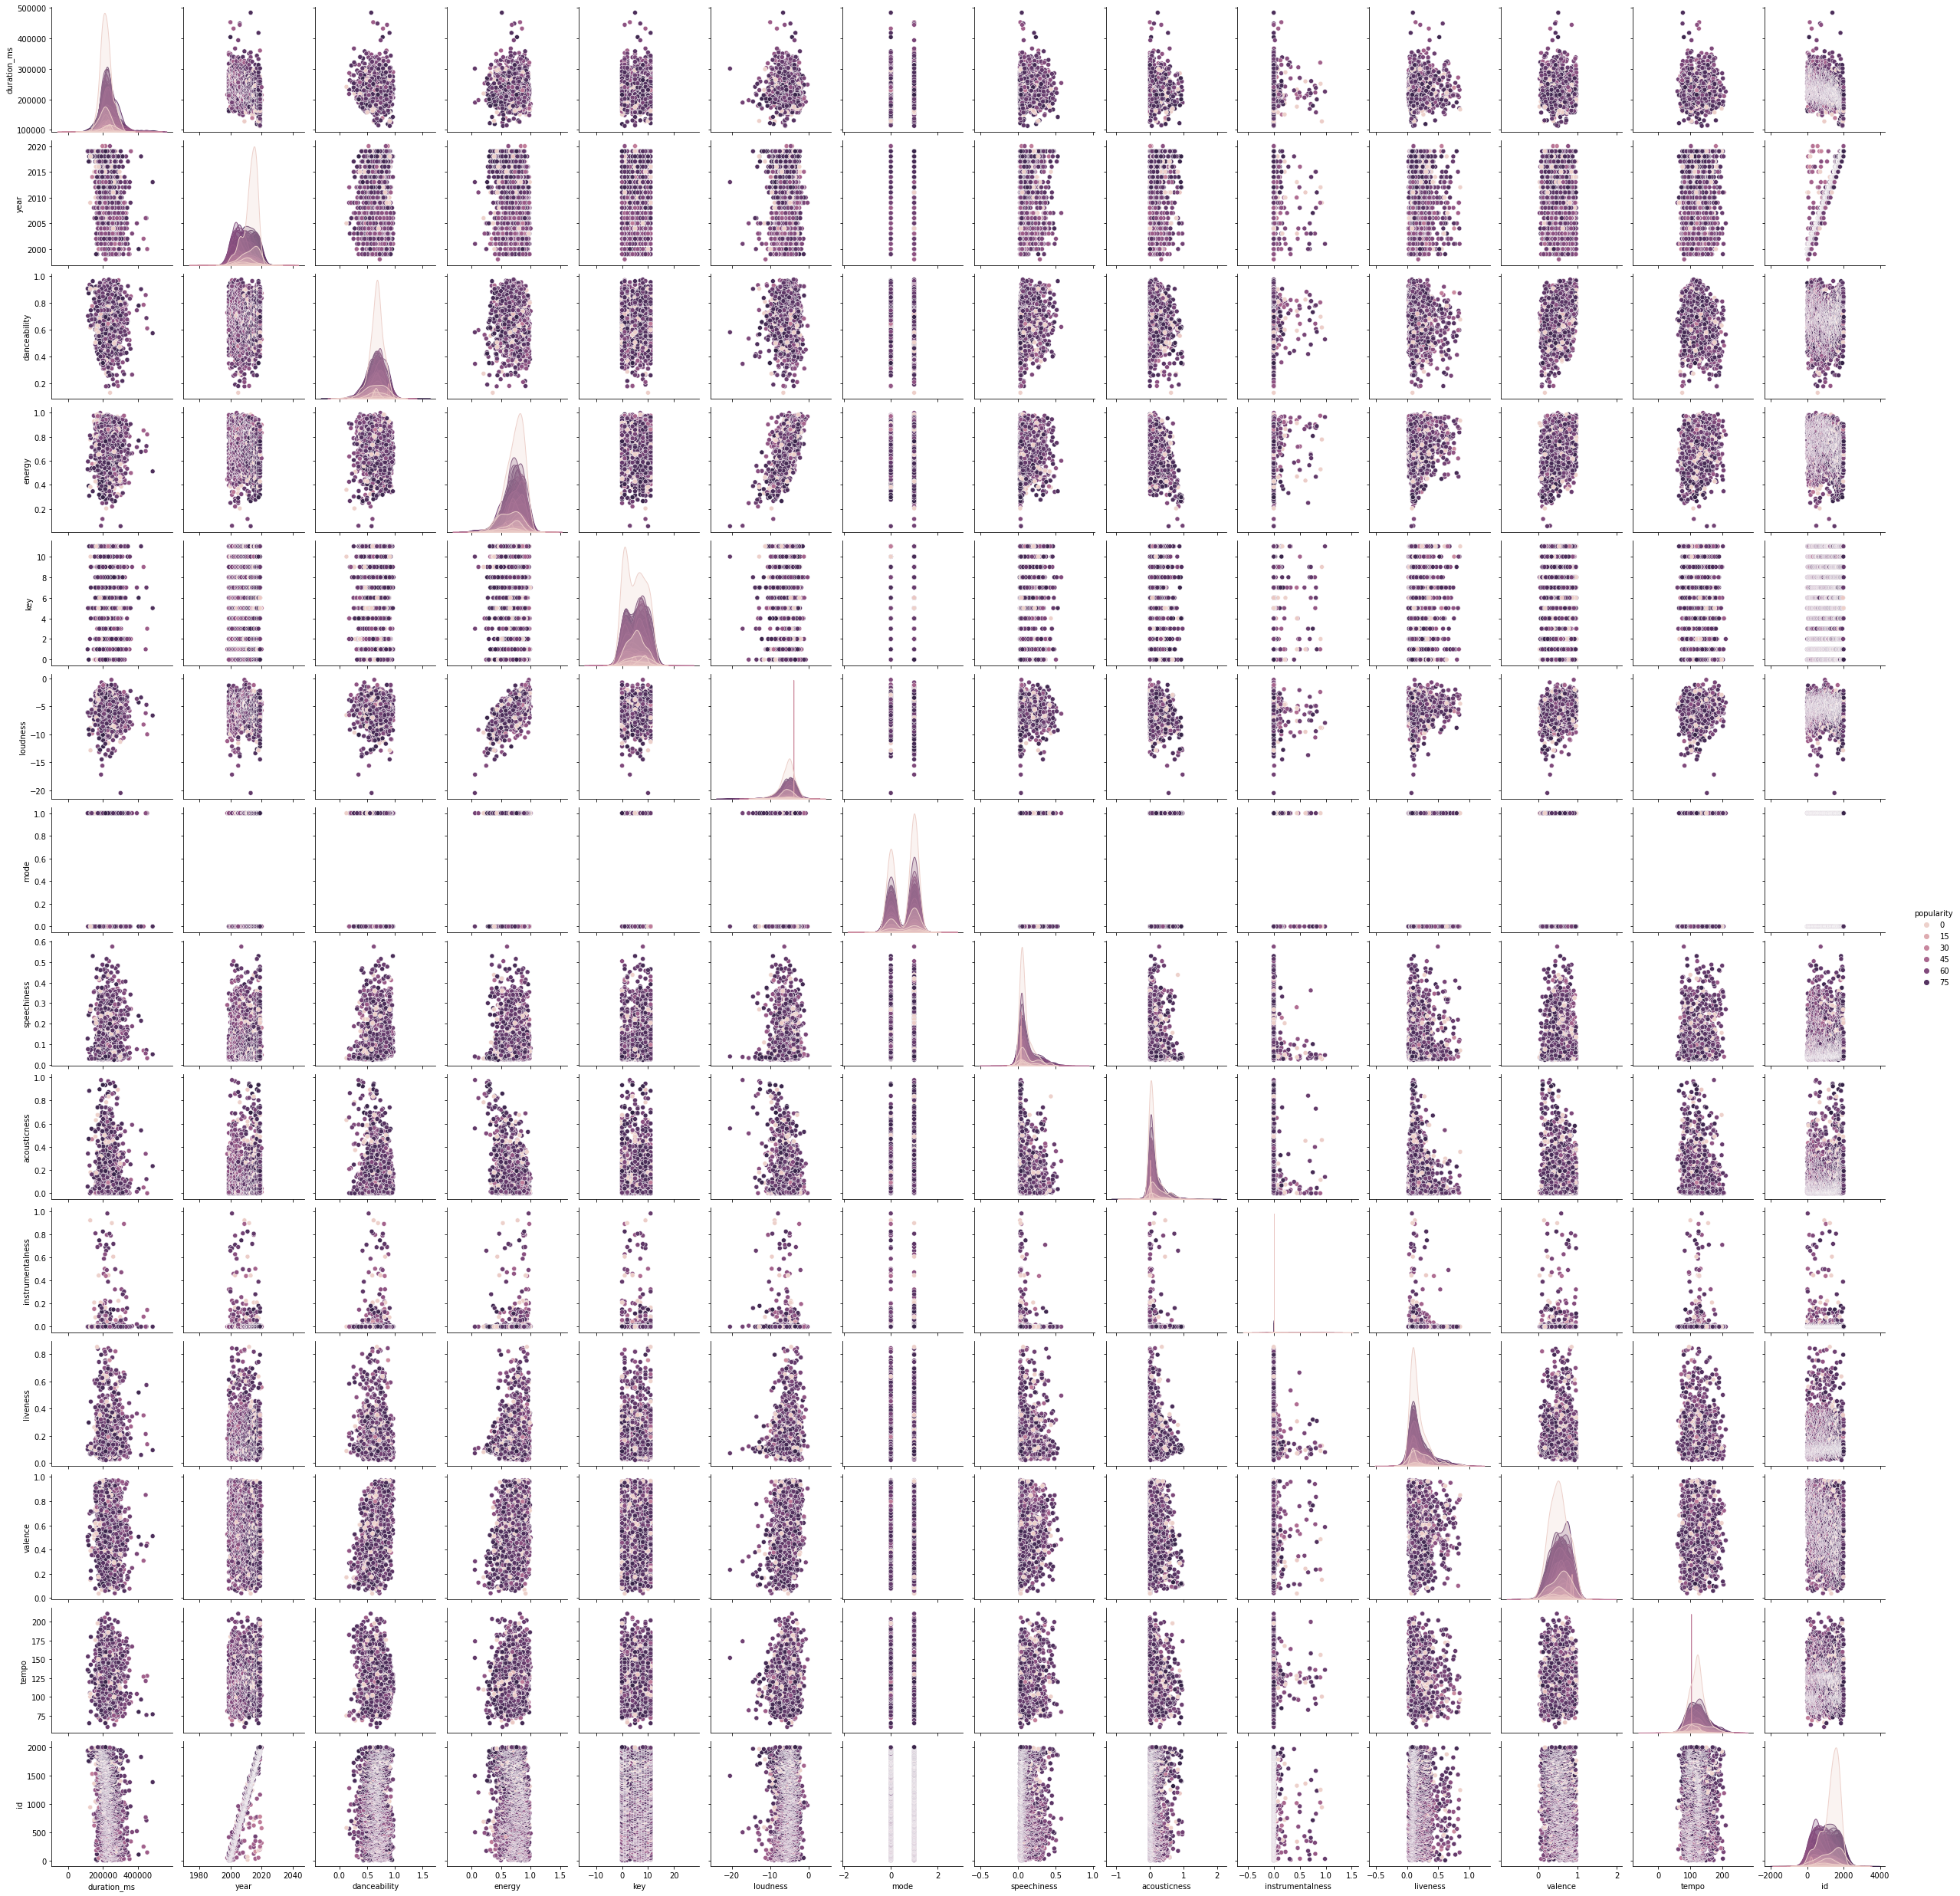

In [24]:
sb.pairplot(top_hits_scatter, hue='popularity')

# Change
We removed values more than 3 sds away from mean [link](https://bookdown.org/pkaldunn/Book/identifying-outliers.html)

In [5]:
from scipy import stats
import numpy as np

top_hits_scatter_no_outliers = top_hits_scatter[(np.abs(stats.zscore(top_hits_scatter)) < 3).all(axis=1)]
#top_hits_scatter_no_outliers = top_hits_scatter[np.abs(top_hits_scatter-top_hits_scatter.mean()) <= (3*top_hits_scatter.std())]
top_hits_scatter_no_outliers.head()

duration_ms  year  popularity  danceability  energy  key  loudness  mode  \
0       211160  2000          77         0.751   0.834    1    -5.444     0   
2       250546  1999          66         0.529   0.496    7    -9.007     1   
3       224493  2000          78         0.551   0.913    0    -4.063     0   
4       200560  2000          65         0.614   0.928    8    -4.806     0   
5       253733  1999          69         0.706   0.888    2    -6.959     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  id  
0       0.0437        0.3000          0.000018    0.3550    0.894   95.053   1  
2       0.0290        0.1730          0.000000    0.2510    0.278  136.859   3  
3       0.0466        0.0263          0.000013    0.3470    0.544  119.992   4  
4       0.0516        0.0408          0.001040    0.0845    0.879  172.656   5  
5       0.0654        0.1190          0.000096    0.0700    0.714  121.549   6

In [6]:
top_hits_scatter_no_outliers.value_counts()

duration_ms  year  popularity  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    id  
113000       2019  76          0.907         0.530   1    -6.112    1     0.1270       0.057800      0.000002          0.1010    0.507    135.998  1932    1
237693       2003  58          0.586         0.705   1    -4.904    0     0.0287       0.048500      0.000000          0.1500    0.459    98.014   347     1
238053       2004  68          0.794         0.614   5    -5.352    0     0.0467       0.096400      0.000000          0.0788    0.663    80.569   563     1
238000       2013  0           0.575         0.821   0    -5.700    1     0.0527       0.181000      0.000000          0.1240    0.449    118.021  1390    1
             2009  65          0.529         0.948   0    -3.527    1     0.0474       0.258000      0.000009          0.2830    0.650    146.024  925     1
                                                               

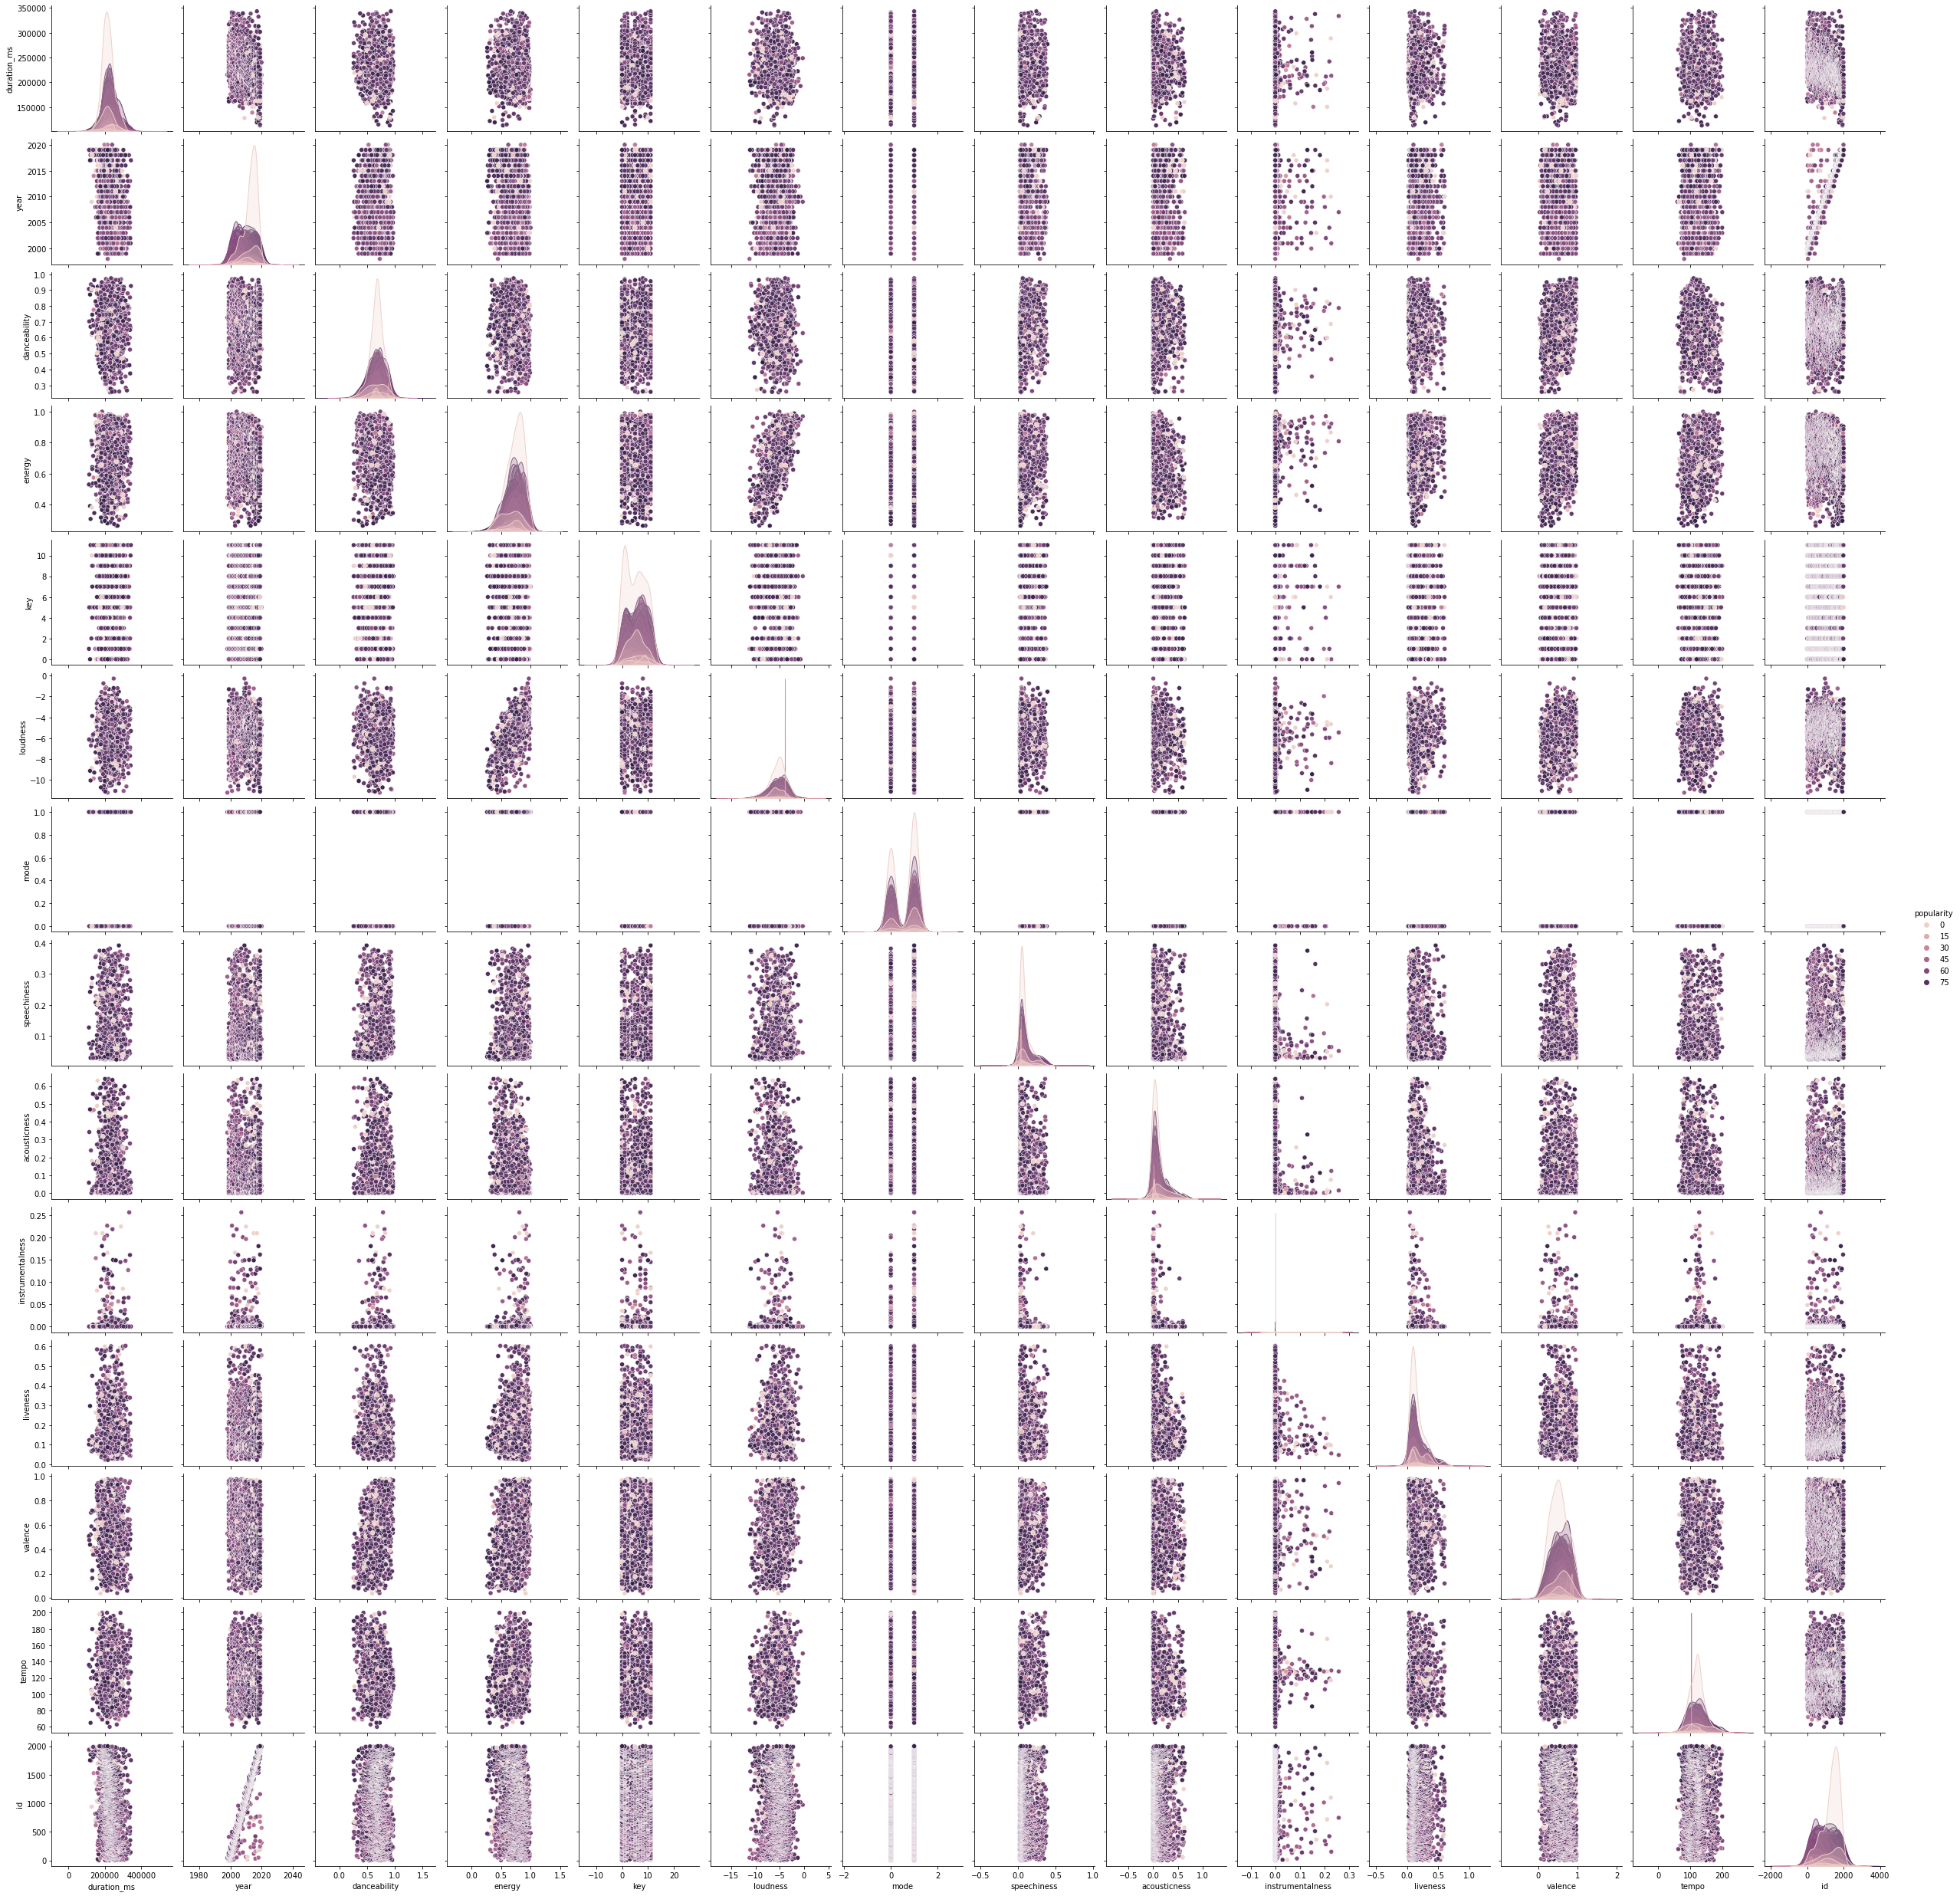

In [10]:
sb.pairplot(top_hits_scatter_no_outliers, hue='popularity')

In [15]:
top_hits_scatter_no_outliers.isnull().any().sum()

0

In [7]:
top_hits_scatter_no_outliers_no_na = top_hits_scatter_no_outliers.dropna()
top_hits_scatter_no_outliers_no_na.isnull().any().sum()
top_hits_scatter_no_outliers_no_na.head()

duration_ms  year  popularity  danceability  energy  key  loudness  mode  \
0       211160  2000          77         0.751   0.834    1    -5.444     0   
2       250546  1999          66         0.529   0.496    7    -9.007     1   
3       224493  2000          78         0.551   0.913    0    -4.063     0   
4       200560  2000          65         0.614   0.928    8    -4.806     0   
5       253733  1999          69         0.706   0.888    2    -6.959     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  id  
0       0.0437        0.3000          0.000018    0.3550    0.894   95.053   1  
2       0.0290        0.1730          0.000000    0.2510    0.278  136.859   3  
3       0.0466        0.0263          0.000013    0.3470    0.544  119.992   4  
4       0.0516        0.0408          0.001040    0.0845    0.879  172.656   5  
5       0.0654        0.1190          0.000096    0.0700    0.714  121.549   6

In [8]:
id_array = top_hits_scatter_no_outliers_no_na['id'].tolist()
top_hits = top_hits.loc[top_hits['id'].isin(id_array)]
top_hits.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   
5           Sisqo              Thong Song       253733      True  1999   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   
5          69         0.706   0.888    2    -6.959     1       0.0654   

   acousticness  instrumentalness  liveness  valence    tempo  \
0        0.3000          0.000018    0.3550    0.894   95.053   
2        0.1730          0.000000    0.2510    0.278  136.859   
3        0.0263          0.000013    0.3470    0.544  119.992   
4        0.0408          0.001040    0.0845    0.879  172.656   
5        0.1190          0.000096    0.0700    0.714  121.549   

               genre  id  
0                pop   1  
2       pop, country   3  
3        rock, metal   4  
4                pop   5  
5  hip hop, pop, R&B   6

In [9]:
top_hits = top_hits.drop(columns=['id'])
top_hits.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   
5           Sisqo              Thong Song       253733      True  1999   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   
5          69         0.706   0.888    2    -6.959     1       0.0654   

   acousticness  instrumentalness  liveness  valence    tempo  \
0        0.3000          0.000018    0.3550    0.894   95.053   
2        0.1730          0.000000    0.2510    0.278  136.859   
3        0.0263          0.000013    0.3470    0.544  119.992   
4        0.0408          0.001040    0.0845    0.879  172.656   
5        0.1190          0.000096    0.0700    0.714  121.549   

               genre  
0                pop  
2       pop, country  
3        rock, metal  
4                pop  
5  hip hop, pop, R&B

## Data processing

### Popularity

Since predicting popularity is our end-goal we had to rank it.

<AxesSubplot:>

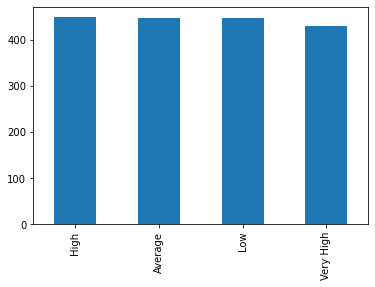

In [10]:
top_hits['pop_rank'] = pd.NaT
top_hits['pop_rank'].mask(top_hits['popularity'] < 57, 'Low', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'].between(57, 66), 'Average', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'].between(66, 74), 'High', inplace=True)
top_hits['pop_rank'].mask(top_hits['popularity'] >= 74, 'Very High', inplace=True)

top_hits['pop_rank'].value_counts()
top_hits['pop_rank'].value_counts().plot(kind='bar')

In [11]:
top_hits = top_hits.drop(columns=['popularity'])

### Exploratory analysis
We checked for correlation between the attributes themselves and to the 'popularity' attribute:

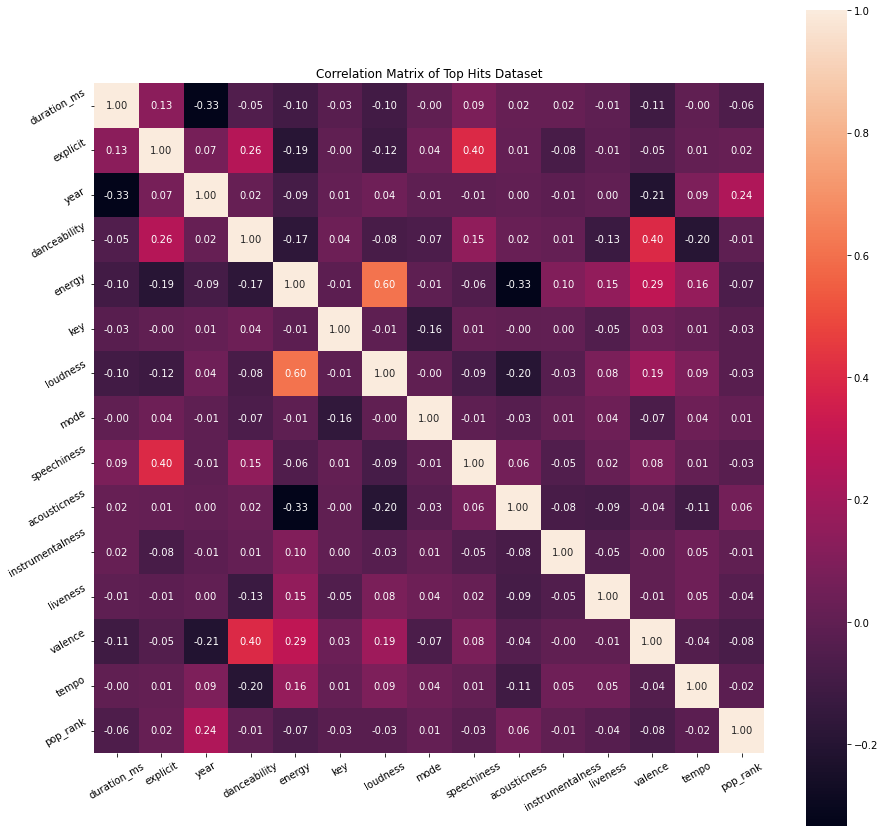

In [12]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder()
le.fit(top_hits['pop_rank'])
top_hits['pop_rank'] = le.transform(top_hits['pop_rank'])
corr_matrix = top_hits.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Matrix of Top Hits Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

With the resulting matrix, we could check the highest correlations from extracting the values from the top right triangle, since it was a mirrored matrix, and found that the highest correlation was of only 0.65.
Since the highest correlation was only 0.65, we decided to aggregate no attributes.

# Classification Algorithms
## Decision Trees

In [13]:
from sklearn.model_selection import train_test_split

inputs = top_hits[['duration_ms', 'explicit', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].values
print(inputs[:5])

labels = top_hits['pop_rank'].values
print(labels[:5])


(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

[[211160 False 2000 0.751 0.834 1 -5.444 0 0.0437 0.3 1.77e-05 0.355
  0.894 95.053]
 [250546 False 1999 0.529 0.496 7 -9.007 1 0.029 0.173 0.0 0.251 0.278
  136.859]
 [224493 False 2000 0.551 0.913 0 -4.063 0 0.0466 0.0263 1.35e-05 0.347
  0.544 119.992]
 [200560 False 2000 0.614 0.928 8 -4.806 0 0.0516 0.0408 0.00104 0.0845
  0.879 172.656]
 [253733 True 1999 0.706 0.888 2 -6.959 1 0.0654 0.119 9.64e-05 0.07
  0.714 121.549]]
[3 1 3 0 1]


In [14]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)

decision_tree_classifier.score(testing_inputs, testing_classes)

0.3108108108108108

In [16]:
y_pred = decision_tree_classifier.predict(testing_inputs)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testing_classes, y_pred))
print(classification_report(testing_classes, y_pred))

[[40 22 19 13]
 [28 39 22 26]
 [28 29 33 27]
 [34 29 29 26]]
              precision    recall  f1-score   support

           0       0.31      0.43      0.36        94
           1       0.33      0.34      0.33       115
           2       0.32      0.28      0.30       117
           3       0.28      0.22      0.25       118

    accuracy                           0.31       444
   macro avg       0.31      0.32      0.31       444
weighted avg       0.31      0.31      0.31       444

